In [1]:
import numpy as np
from numpy import vectorize
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from ipywidgets import interact
# for numerical integration
from scipy.integrate import quad

In [8]:
Llead=200
mu_lead=0.6
Lsc=40
L=100
t=1
Delta=0.1
mu=0.6

sx=np.array([[0,1],[1,0]])
sy=np.array([[0,-1j],[1j,0]])
sz=np.array([[1,0],[0,-1]])
sp=np.array([[1,0],[0,0]])
sh=np.array([[0,0],[0,1]])


def gn_l(k,x,params,s,r_i):
    mu_lead=params['mu_lead']
    t= params['t']
    eta= params['eta']
    E= params['E']
#     r_i=params['r_i']
    Ek= 2*t-2*t*np.cos(k)-mu_lead
    if r_i==True:
        gk=np.real(np.exp(1j*k*x)/(E+ 1j*eta-s*Ek))
    else:
        gk=np.imag(np.exp(1j*k*x)/(E+ 1j*eta-s*Ek))
    return gk

def gs_r(k,x,params,i1,i2,r_i):
    mu=params['mu']
    Delta=params['Delta']
    t= params['t']
    eta= params['eta']
    E= params['E']
#     r_i=params['r_i']
    Ek= (2*t-2*t*np.cos(k)-mu)*sz+ Delta*sx
    if r_i==True:
        gk=np.real(np.exp(1j*k*x)*np.linalg.inv( (E+ 1j*eta)*np.eye(2)- Ek))
    else:
        gk=np.imag(np.exp(1j*k*x)*np.linalg.inv( (E+ 1j*eta)*np.eye(2)- Ek))
    return gk[i1,i2]

hopp_lead = np.diag(np.ones(Llead-1),1)
# hopp_lead[Llead-1,0]=1
H_l = -t*(hopp_lead+hopp_lead.T)+(2*t-mu_lead)*np.eye(Llead)
El, Vl =np.linalg.eigh(H_l)
vloc_l=np.zeros(L)
vloc_l[0]=1
loc_l=np.diag(vloc_l)

H_r = np.kron(-t*(hopp_lead+hopp_lead.T)+(2*t-mu)*np.eye(Llead),sz)+\
    Delta*np.kron(np.eye(Llead),sx)
Er, Vr =np.linalg.eigh(H_r)
vloc_r=np.zeros(L)
vloc_r[L-1]=1
loc_r=np.diag(vloc_r)

hopp = np.diag(np.ones(L-1),1)
H = np.kron(-t*(hopp+hopp.T)+(2*t-mu)*np.eye(L),sz)+\
    Delta*np.kron(np.diag(np.concatenate((np.zeros(L-Lsc),np.ones(Lsc)))),sx)


Esw = np.linspace(-2,2,100)*Delta
evs, evecs =np.linalg.eigh(H)

# GR=np.zeros((2,2,len(Esw)), dtype=np.complex64)
# Smat=np.zeros((2,2,len(Esw)), dtype=np.complex64)
Seh=np.zeros(len(Esw), dtype=np.complex64)
See=np.zeros(len(Esw), dtype=np.complex64)
for i_E in range(len(Esw)):
    E=Esw[i_E]
    eta=1e-1
#     if np.abs(E)< Delta:
#         eta=1e-1*Delta
#     else:
#         eta=1e-1*Delta
        
#     params=dict(t=t, mu=mu, mu_lead=mu_lead, eta=eta, Delta=Delta, E=E)
#     gl_p0= quad(gn_l, -pi, pi, args=(0,params,1,True))[0] + 1j* quad(gn_l, -pi, pi, args=(0, params,1,False))[0]
#     gl_p1= quad(gn_l, -pi, pi, args=(1,params,1,True))[0] + 1j* quad(gn_l, -pi, pi, args=(1, params,1,False))[0]
#     gl_p=-t*gl_p0/gl_p1
# #     params['r_i']=False
# #     gl_pimag= quad(gn_l, -pi, pi, args=(params,1))
# #     gl_p=(gl_preal[0]+1j*gl_pimag[0])/(2*pi)
    
# #     params['r_i']=True
# #     gl_hreal= quad(gn_l, -pi, pi, args=(0, params,-1,True))
# #     params['r_i']=False
# #     gl_himag= quad(gn_l, -pi, pi, args=(0, params,-1,False))
# #     gl_h=(gl_hreal[0]+1j*gl_himag[0])/(2*pi)
#     gl_h0= quad(gn_l, -pi, pi, args=(0,params,-1,True))[0] + \
#             1j* quad(gn_l, -pi, pi, args=(0, params,-1,False))[0]
#     gl_h1= quad(gn_l, -pi, pi, args=(1,params,-1,True))[0] + \
#             1j* quad(gn_l, -pi, pi, args=(1, params,-1,False))[0]
#     gl_h=-t*gl_h0/gl_h1

    gl_p=np.dot(Vl[Llead-1,:],np.dot(np.diag(1/(E-El+1j*eta)),np.transpose(Vl[Llead-1,:]).conj()))
    gl_h=np.dot(Vl[Llead-1,:],np.dot(np.diag(1/(E+El+1j*eta)),np.transpose(Vl[Llead-1,:]).conj()))
    gamma_p= 1j*(np.kron(loc_l,gl_p*sp)-np.kron(loc_l,np.conj(gl_p)*sp))
    gamma_h= 1j*(np.kron(loc_l,gl_h*sh)-np.kron(loc_l,np.conj(gl_h)*sh))
    
#     gr_0=np.zeros((2,2), dtype=np.complex64)
#     gr_1=np.zeros((2,2), dtype=np.complex64)
#     for i2 in range(2):
#         for i1 in range(2):
#             gr_0[i1,i2]= quad(gs_r, -pi, pi, args=(0, params,i1,i2, True))[0]+\
#                         1j* quad(gs_r, -pi, pi, args=(0, params,i1,i2, False))[0]
#             gr_1[i1,i2]= quad(gs_r, -pi, pi, args=(1, params,i1,i2, True))[0]+\
#                         1j* quad(gs_r, -pi, pi, args=(1, params,i1,i2, False))[0]
#     gr=np.dot(-t*sz,np.dot(np.linalg.inv(gr_0),gr_1))

    gr=np.dot(Vr[:2,:],np.dot(np.diag(1/(E-Er+1j*eta)),np.transpose(Vr[:2,:]).conj()))
    grT=np.transpose(gr).conj()
    gamma_s= 1j*(np.kron(loc_r,np.dot(sz,np.dot(gr,sz)))-np.kron(loc_r,np.dot(sz,np.dot(grT,sz))))
    Sigma=np.kron(loc_r,np.dot(sz,np.dot(gr,sz)))+ np.kron(loc_l,np.diag([gl_p,gl_h]))
    
    GR= np.linalg.inv((E+1j*eta*0)*np.eye(2*L)-H-Sigma)
    GA= np.transpose(GR).conj()
    Seh[i_E]= np.trace( np.dot(gamma_p,np.dot(GR, np.dot(gamma_h,GA))))
    See[i_E]= np.trace( np.dot(gamma_s,np.dot(GR, np.dot(gamma_p,GA))))
    
#     GR=np.dot(evecs[0:1,:],np.dot(np.diag(1/(E-evs+1j*eta)),np.transpose(evecs[0:1,:]).conj()))
#     GA= np.transpose(GR).conj()
#     Smat[:,:,i_E]=np.dot(GR[:,:,i_E],np.transpose(GR[:,:,i_E]).conj())
#     GR=np.dot(evecs,np.dot(np.diag(1/(E-evs+1j*eta)),np.transpose(evecs).conj()))
#     Seh[i_E]= np.trace( np.dot(gamma_p,np.dot(GR, np.dot(gamma_h,GA))))
#     Gsq=np.dot(GR,np.transpose(GR).conj())
#     Smat[:,:,i_E]=Gsq[:1,:1]


# Seh=np.reshape(Smat[0,1,:],[len(Esw),1]) #* (klist[1]-klist[0])                        
# See=np.reshape(Smat[0,0,:],[len(Esw),1]) #* (klist[1]-klist[0])                        


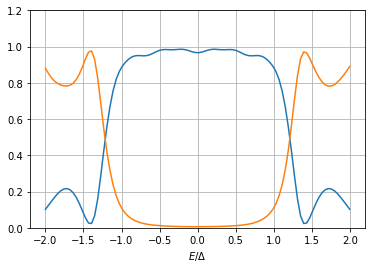

In [10]:
plt.figure()
plt.plot(Esw/Delta,np.abs(Seh))
plt.plot(Esw/Delta,np.abs(See))
# plt.plot(Esw/Delta,np.abs(See))
plt.ylim(0,1.2)
plt.grid()
plt.xlabel(r'$r_{eh}$')
plt.xlabel(r'$E/\Delta$')
plt.show()

In [ ]:
a=np.random.rand(2,2)
print(a)
print(np.reshape(a,[4,]).shape)

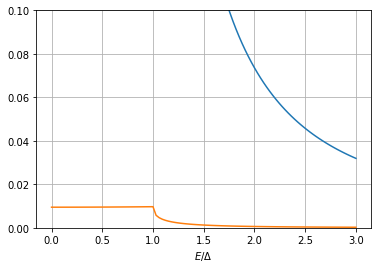

In [17]:

import kwant
import tinyarray
import numpy as np

tau_x = tinyarray.array([[0, 1], [1, 0]])
tau_y = tinyarray.array([[0, -1j], [1j, 0]])
tau_z = tinyarray.array([[1, 0], [0, -1]])

def make_system(a=1, W=10, L=100, barrier=0, barrierpos=(0, 1),
                mu=0.6, Delta=0.1, Deltapos=60, t=1.0):
    # Start with an empty tight-binding system. On each site, there
    # are now electron and hole orbitals, so we must specify the
    # number of orbitals per site. The orbital structure is the same
    # as in the Hamiltonian.
    lat = kwant.lattice.square(norbs=2)
    syst = kwant.Builder()

    #### Define the scattering region. ####
    # The superconducting order parameter couples electron and hole orbitals
    # on each site, and hence enters as an onsite potential.
    # The pairing is only included beyond the point 'Deltapos' in the scattering region.
    syst[(lat(x, y) for x in range(Deltapos) for y in range(W))] = (2 * t - mu) * tau_z
    syst[(lat(x, y) for x in range(Deltapos, L) for y in range(W))] = (2 * t - mu) * tau_z + Delta * tau_x

    # The tunnel barrier
    syst[(lat(x, y) for x in range(barrierpos[0], barrierpos[1])
         for y in range(W))] = (2 * t + barrier - mu) * tau_z

    # Hoppings
    syst[lat.neighbors()] = -t * tau_z
    #### Define the leads. ####
    # Left lead - normal, so the order parameter is zero.
    sym_left = kwant.TranslationalSymmetry((-a, 0))
    # Specify the conservation law used to treat electrons and holes separately.
    # We only do this in the left lead, where the pairing is zero.
    lead0 = kwant.Builder(sym_left, conservation_law=-tau_z, particle_hole=tau_y)
#     lead0[(lat(0, j) for j in range(W))] = (4 * t - mu) * tau_z
    lead0[(lat(0, j) for j in range(W))] = (2 * t - mu) * tau_z
    lead0[lat.neighbors()] = -t * tau_z
    # Right lead - superconducting, so the order parameter is included.
    sym_right = kwant.TranslationalSymmetry((a, 0))
    lead1 = kwant.Builder(sym_right)
#     lead1[(lat(0, j) for j in range(W))] = (4 * t - mu) * tau_z + Delta * tau_x
    lead1[(lat(0, j) for j in range(W))] = (2 * t - mu) * tau_z + Delta * tau_x
    lead1[lat.neighbors()] = -t * tau_z

    #### Attach the leads and return the system. ####
    syst.attach_lead(lead0)
    syst.attach_lead(lead1)

    return syst


Esw = np.linspace(0,3,100)*Delta
L=100
Lsc=100
syst = make_system(W=1,L=L, Deltapos=L-Lsc)

# Check that the system looks as intended.
# kwant.plot(syst)

# Finalize the system.
syst = syst.finalized()

# Check particle-hole symmetry of the scattering matrix
# check_PHS(syst)

# Compute and plot the conductance
#     plot_conductance(syst, energies=[0.002 * i for i in range(-10, 100)])
Peh=np.zeros((len(Esw),2), dtype=np.complex64)
for i_E in range(len(Esw)):
    E=Esw[i_E]
    smatrix = kwant.smatrix(syst, energy=E)
    Peh[i_E,0]=smatrix.transmission((0, 1), (0, 0))
    Peh[i_E,1]=smatrix.transmission((0, 0), (0, 0))


plt.figure()
# plt.plot(Esw/Delta,np.abs(Seh))
plt.plot(Esw/Delta,np.abs(Peh))
plt.ylim(0,.1)
plt.grid()
plt.xlabel(r'$r_{eh}$')
plt.xlabel(r'$E/\Delta$')
plt.show()

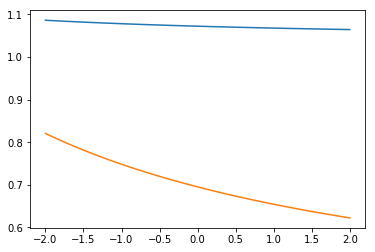

In [8]:
# check the green function of semi infinite

Llead=200
mu_lead=0.6
Lsc=40
L=100
t=1
Delta=0.1
mu=0.6

sx=np.array([[0,1],[1,0]])
sy=np.array([[0,-1j],[1j,0]])
sz=np.array([[1,0],[0,-1]])
sp=np.array([[1,0],[0,0]])
sh=np.array([[0,0],[0,1]])


def gn_l(k,x,params,s,r_i):
    mu_lead=params['mu_lead']
    t= params['t']
    eta= params['eta']
    E= params['E']
#     r_i=params['r_i']
    Ek= 2*t-2*t*np.cos(k)-mu_lead
    if r_i==True:
        gk=np.real(np.exp(1j*k*x)/(E+ 1j*eta-s*Ek))
    else:
        gk=np.imag(np.exp(1j*k*x)/(E+ 1j*eta-s*Ek))
    return gk

def gs_r(k,x,params,i1,i2,r_i):
    mu=params['mu']
    Delta=params['Delta']
    t= params['t']
    eta= params['eta']
    E= params['E']
#     r_i=params['r_i']
    Ek= (2*t-2*t*np.cos(k)-mu)*sz+ Delta*sx
    if r_i==True:
        gk=np.real(np.exp(1j*k*x)*np.linalg.inv( (E+ 1j*eta)*np.eye(2)- Ek))
    else:
        gk=np.imag(np.exp(1j*k*x)*np.linalg.inv( (E+ 1j*eta)*np.eye(2)- Ek))
    return gk[i1,i2]

hopp_lead = np.diag(np.ones(Llead-1),1)
hopp_lead[Llead-1,0]=1
H_l = -t*(hopp_lead+hopp_lead.T)+(2*t-mu_lead)*np.eye(Llead)
El, Vl =np.linalg.eigh(H_l)

H_r = np.kron(-t*(hopp_lead+hopp_lead.T)+(2*t-mu)*np.eye(Llead),sz)+\
    Delta*np.kron(np.eye(Llead),sx)
Er, Vr =np.linalg.eigh(H_r)


Esw = np.linspace(-2,2,100)*Delta

gl_p=np.zeros(len(Esw), dtype=np.complex64)
gl_h=np.zeros(len(Esw), dtype=np.complex64)
gr=np.zeros(len(Esw), dtype=np.complex64)

gl_p_latt=np.zeros(len(Esw), dtype=np.complex64)
gl_h_latt=np.zeros(len(Esw), dtype=np.complex64)
gr_latt=np.zeros(len(Esw), dtype=np.complex64)


for i_E in range(len(Esw)):
    E=Esw[i_E]
    eta=1e-1
        
    params=dict(t=t, mu=mu, mu_lead=mu_lead, eta=eta, Delta=Delta, E=E)
    gl_p0= quad(gn_l, -pi, pi, args=(4,params,1,True))[0] + 1j* quad(gn_l, -pi, pi, args=(4, params,1,False))[0]
    gl_p1= quad(gn_l, -pi, pi, args=(5,params,1,True))[0] + 1j* quad(gn_l, -pi, pi, args=(5, params,1,False))[0]
    gl_p[i_E]=-t*gl_p0/gl_p1
#     gdiff=1
#     gl_p0=0
# #     while gdiff>1e-2:
# #         gl_p1= 1/(E -(2*t-mu)-t**2 *gl_p0 )
# #         gdiff=np.abs(gl_p1-gl_p0)/np.abs(gl_p1)
# #         gl_p0=gl_p1
#     H0= 2*t-mu
#     gl_p[i_E]= ( (E+1j*eta-H0)-((E+1j*eta-H0)**2-4*t**2)**0.5 )/(2*t**2)
    
#     gl_h0= quad(gn_l, -pi, pi, args=(0,params,-1,True))[0] + \
#             1j* quad(gn_l, -pi, pi, args=(0, params,-1,False))[0]
#     gl_h1= quad(gn_l, -pi, pi, args=(1,params,-1,True))[0] + \
#             1j* quad(gn_l, -pi, pi, args=(1, params,-1,False))[0]
#     gl_h[i_E]=-t*gl_h0/gl_h1

#     gl_p_latt[i_E]=np.dot(Vl[0,:],np.dot(np.diag(1/(E-El+1j*eta)),np.transpose(Vl[0,:]).conj()))
    gl_p_latt[i_E]=np.dot(Vl[Llead-1,:],np.dot(np.diag(1/(E-El+1j*eta)),np.transpose(Vl[Llead-1,:]).conj()))
#     gl_h_latt[i_E]=np.dot(Vl[Llead-1,:],np.dot(np.diag(1/(E+El+1j*eta)),np.transpose(Vl[Llead-1,:]).conj()))
    
#     gr_0=np.zeros((2,2), dtype=np.complex64)
#     gr_1=np.zeros((2,2), dtype=np.complex64)
#     for i2 in range(2):
#         for i1 in range(2):
#             gr_0[i1,i2]= quad(gs_r, -pi, pi, args=(0, params,i1,i2, True))[0]+\
#                         1j* quad(gs_r, -pi, pi, args=(0, params,i1,i2, False))[0]
#             gr_1[i1,i2]= quad(gs_r, -pi, pi, args=(1, params,i1,i2, True))[0]+\
#                         1j* quad(gs_r, -pi, pi, args=(1, params,i1,i2, False))[0]
#     gr[i_E]=np.dot(-t*sz,np.dot(np.linalg.inv(gr_0),gr_1))

#     gr_latt[i_E]=np.dot(Vr[:2,:],np.dot(np.diag(1/(E-Er+1j*eta)),np.transpose(Vr[:2,:]).conj()))

plt.figure()
plt.plot(Esw/Delta,np.abs(gl_p))
plt.plot(Esw/Delta,np.abs(gl_p_latt))
plt.show()


In [ ]:
# ((E-H0)**2-4*t**2)**0.5
print(((E+1j*eta-H0)-((E+1j*eta-H0)**2-4*t**2)**0.5)/(2*t**2))